In [3]:
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
import imageio
import testCases
from dnn_utils import sigmoid,sigmoid_backward,relu,relu_backward
import lr_utils

ModuleNotFoundError: No module named 'matplotlib'

In [6]:
np.random.seed(1)#生成第1堆的随机数，要生成两次同样的随机数要调用量子种子函数
lay=[5,3,4]
l=len(lay)
print(l)
for i in range(1,l):
    print(i)

3
1
2


In [7]:
def initialize_parameters(n_x,n_h,n_y):
  
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert(W1.shape == (n_h,n_x))
    assert(W2.shape == (n_y,n_h))
    assert(b1.shape == (n_h,1))
    assert(b2.shape == (n_y,1))#使用断言确保我的数据格式是正确的
    
    parameters = {"W1":W1,
                 "W2":W2,
                 "b1":b1,
                 "b2":b2}
    
    return parameters

In [8]:
print("==============测试initialize_parameters==============")
parameters = initialize_parameters(3,2,1)
print("W1="+str(parameters["W1"]))
print("b1="+str(parameters["b1"]))
print("W2="+str(parameters["W2"]))
print("b2="+str(parameters["b2"]))

==============测试initialize_parameters==============
W1=[[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1=[[0.]
 [0.]]
W2=[[ 0.01744812 -0.00761207]]
b2=[[0.]]


In [9]:
def initialize_parameters_deep(layers_dims): #layers_dims为一个数组
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) #L的层数包含了输入层
    
    for l in range(1,L):
        parameters["W" + str(l)]= np.random.randn(layers_dims[l],layers_dims[l-1])/np.sqrt(layers_dims[l-1])
        #np.sqrt求平方根
        parameters["b" + str(l)]= np.zeros((layers_dims[l],1))
        
        assert(parameters["W"+str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b"+str(l)].shape == (layers_dims[l],1))
        
    return parameters  #return不对其的话会导致错误

In [10]:
#测试initialize_parameters_deep
print("==============测试initialize_parameters_deep==============")
layers_dims = [5,4,3]
Len = len(layers_dims)
parameters = initialize_parameters_deep(layers_dims)
for i in range(1,Len):
    print("W"+str(i)+"="+str(parameters["W"+str(i)]))
    print("b"+str(i)+"="+str(parameters["b"+str(i)]))



==============测试initialize_parameters_deep==============
W1=[[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
b1=[[0.]
 [0.]
 [0.]
 [0.]]
W2=[[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]
b2=[[0.]
 [0.]
 [0.]]


In [11]:
def linear_forward(A,W,b):
    #A表示初始的X
    Z = np.dot(W,A) + b
    assert(Z.shape == (W.shape[0],A.shape[1])) #矩阵相乘后的秩
    cache =(A,W,b)# cache - 一个包含“A”，“W”和“b”的字典，存储这些变量以有效地计算后向传递
    return Z,cache

In [12]:
#测试linear_forward
print("==============测试linear_forward==============")
A,W,b = testCases.linear_forward_test_case()
Z,linear_cache = linear_forward(A,W,b)
print("Z = "+str(Z))
print(linear_cache[1])#打印W

==============测试linear_forward==============
Z = [[ 3.26295337 -1.23429987]]
[[ 1.74481176 -0.7612069   0.3190391 ]]


In [13]:
def linear_activation_forward(A_prev,W,b,activation):
    
    if activation == "sigmoid":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = sigmoid(Z)  #开头已经import dnn里面的函数sigmoid
        
    elif activation == "relu":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = relu(Z)
        
    assert(A.shape == Z.shape)
    #assert(A.shape == (W.shape[0],A_prev.shape[1]))
    cache = (linear_cache,activation_cache) #前者为(A,W,b),后者为(Z)
    
    return A,cache

In [14]:
#测试linear_activation_forward
print("==============测试linear_activation_forward==============")
A_prev,W,b = testCases.linear_activation_forward_test_case()
A,linear_activation_cache = linear_activation_forward(A_prev,W,b,activation="sigmoid")
print("sigmoid: A=" + str(A))
A,linear_activation_cache = linear_activation_forward(A_prev,W,b,activation = "relu")
print("ReLU: A = " + str(A))

==============测试linear_activation_forward==============
sigmoid: A=[[0.96890023 0.11013289]]
ReLU: A = [[3.43896131 0.        ]]


In [15]:
def L_model_forward(X,parameters): #参数： X - 数据，numpy数组，维度为（输入节点数量，示例数） parameters - initialize_parameters_deep（）的输出
    caches = []  #表示一个数组
    A = X  #X表示输入的数据
    L = len(parameters)//2  #//整除，本来有层数个W和B，因此要除二
    for l in range(1,L):
        A_prev = A
        A,cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],'relu')
        caches.append(cache)  #在cache后面加字符串cache
   
    AL,cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],'sigmoid')
    caches.append(cache)
    return AL,caches
  

In [16]:
#测试L_model_forward
print("==============测试L_model_forward==============")
X,parameters = testCases.L_model_forward_test_case( )
AL,caches = L_model_forward(X,parameters)
print("AL = " +str(AL))
print("The length of caches is:" + str(len (caches)))

==============测试L_model_forward==============
AL = [[0.17007265 0.2524272 ]]
The length of caches is:2


In [17]:
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    cost = -np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL),1-Y))/m
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [18]:
#测试compute_cost
print("==============测试compute_cost==============")
Y,AL = testCases.compute_cost_test_case()
print("cost = " + str(compute_cost(AL,Y)))

==============测试compute_cost==============
cost = 0.414931599615397


In [19]:
def linear_backward(dZ,cache):  #最后输出层的dZ可以算出来
    A_prev,W,b = cache  #cache为一个矩阵数组
    m = A_prev.shape[1]
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    
    return dA_prev,dW,db

In [20]:
#测试linear_backward
print("==============测试linear_backward==============")
dZ,linear_cache = testCases.linear_backward_test_case()
dA_prev,dW,db = linear_backward(dZ,linear_cache)
print("dA_prev = " + str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db))

==============测试linear_backward==============
dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [21]:
def linear_activation_backward(dA,cache,activation="relu"):
    """
    实现LINEAR-> ACTIVATION层的后向传播。
    
    参数：
         dA - 当前层l的激活后的梯度值
         cache - 我们存储的用于有效计算反向传播的值的元组（值为linear_cache，activation_cache）
         activation - 要在此层中使用的激活函数名，字符串类型，【"sigmoid" | "relu"】
    返回：
         dA_prev - 相对于激活（前一层l-1）的成本梯度值，与A_prev维度相同
         dW - 相对于W（当前层l）的成本梯度值，与W的维度相同
         db - 相对于b（当前层l）的成本梯度值，与b的维度相同
    """
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev,dW,db


In [23]:
#测试linear_activation_backward
print("==============测试linear_activation_backward==============")
AL,linear_activation_cache = testCases.linear_activation_backward_test_case()

dA_prev,dW,db = linear_activation_backward(AL,linear_activation_cache,activation="sigmoid")
print("sigmoid:")
print("dA_prev = " + str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db)+"\n")

dA_prev,dW,db = linear_activation_backward(AL,linear_activation_cache,activation="relu")
print("relu:")
print("dA_prev = " + str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db)+"\n")
for l in reversed(range(3)):
    print(l)

==============测试linear_activation_backward==============
sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]

2
1
0


In [2]:
def L_model_backward(AL,Y,caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = -(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    
    current_cache = caches[L-1]
    grads["dA"+str(L)],grads["dW"+str(L)],grads["db"+str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    #先做一次sigmoid的向后传播
    
    for l in reversed(range(L-1)):   #从L-2到0
        current_cache = caches[l]
        dA_prev_temp,dW_temp,db_temp = linear_activation_backward(grads["dA" +str(l+2)],current_cache,"relu")
        #l从L-2开始，我们规定了L层是输出层，因此向前一层应该是l+1层
        grads["dA"+str(l+1)] = dA_prev_temp
        grads["dW"+str(l+1)] = dW_temp
        grads["db"+str(l+1)] = db_temp
    return grads



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)

In [57]:
#测试L_model_backward
print("==============测试L_model_backward==============")
AL,Y_assess,caches = testCases.L_model_backward_test_case()
grads = L_model_backward(AL,Y_assess,caches)
print("dA1 = "+ str(grads["dA1"]))
print("dW1 = "+ str(grads["dW1"]))
print("dA1 = "+ str(grads["dA1"]))


==============测试L_model_backward==============
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]
dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


In [58]:
def update_parameters(parameters, grads, learning_rate):
    """
    使用梯度下降更新参数
    
    参数：
     parameters - 包含你的参数的字典
     grads - 包含梯度值的字典，是L_model_backward的输出
    
    返回：
     parameters - 包含更新参数的字典
                   参数[“W”+ str（l）] = ...
                   参数[“b”+ str（l）] = ...
    """
    L = len(parameters) // 2 #整除
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters


In [59]:
#测试update_parameters
print("==============测试update_parameters==============")
parameters,grads = testCases.update_parameters_test_case()
parameters = update_parameters(parameters,grads,0.1)
print("W1 = "+ str(parameters["W1"]))
print("b1 = "+ str(parameters["b1"]))
print("W2 = "+ str(parameters["W2"]))
print("b2 = "+ str(parameters["b2"]))

==============测试update_parameters==============
W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [60]:
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False,isPlot=True):
    np.random.seed(1)
    grads = {}
    costs = []
    (n_x,n_h,n_y) = layers_dims
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0,num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        cost = compute_cost(A2,Y)
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2)) 
        dA1, dW2, db2 = linear_activation_backward(dA2,cache2,"sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1,cache1,"relu")    
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2       
        parameters = update_parameters(parameters,grads,learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]      
        if i % 100 == 0:
            costs.append(cost)         
            if print_cost:
                print("第",i,"次迭代，成本值为:",np.squeeze(cost))
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" +str(learning_rate))
        plt.show()         
    return parameters
        

In [61]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes = lr_utils.load_dataset()
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
#上面的语句对训练集图片进行压缩,有209个样本
print(train_set_x_orig.shape)
print(train_x_flatten.shape)
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
train_x = train_x_flatten/255
train_y = train_set_y  #标签值
test_x = test_x_flatten/255
test_y = test_set_y #测试集的标签值
print(train_y.shape)
print(test_y.shape)
#除以255，让标准化的数据位于[0,1]之间，标准化我们的数据集

(209, 64, 64, 3)
(12288, 209)
(1, 209)
(1, 50)


第 0 次迭代，成本值为: 0.6930497356599891
第 100 次迭代，成本值为: 0.6464320953428849
第 200 次迭代，成本值为: 0.6325140647912676
第 300 次迭代，成本值为: 0.6015024920354665
第 400 次迭代，成本值为: 0.5601966311605747
第 500 次迭代，成本值为: 0.5158304772764732
第 600 次迭代，成本值为: 0.4754901313943326
第 700 次迭代，成本值为: 0.43391631512257517
第 800 次迭代，成本值为: 0.4007977536203885
第 900 次迭代，成本值为: 0.35807050113237915
第 1000 次迭代，成本值为: 0.3394281538366412
第 1100 次迭代，成本值为: 0.305275363619627
第 1200 次迭代，成本值为: 0.2749137728213022
第 1300 次迭代，成本值为: 0.24681768210614743
第 1400 次迭代，成本值为: 0.1985073503746613
第 1500 次迭代，成本值为: 0.1744831811255645
第 1600 次迭代，成本值为: 0.17080762978094413
第 1700 次迭代，成本值为: 0.11306524562164803
第 1800 次迭代，成本值为: 0.09629426845937157
第 1900 次迭代，成本值为: 0.0834261795972689
第 2000 次迭代，成本值为: 0.07439078704319094
第 2100 次迭代，成本值为: 0.06630748132267916
第 2200 次迭代，成本值为: 0.059193295010381605
第 2300 次迭代，成本值为: 0.05336140348560558
第 2400 次迭代，成本值为: 0.04855478562877011


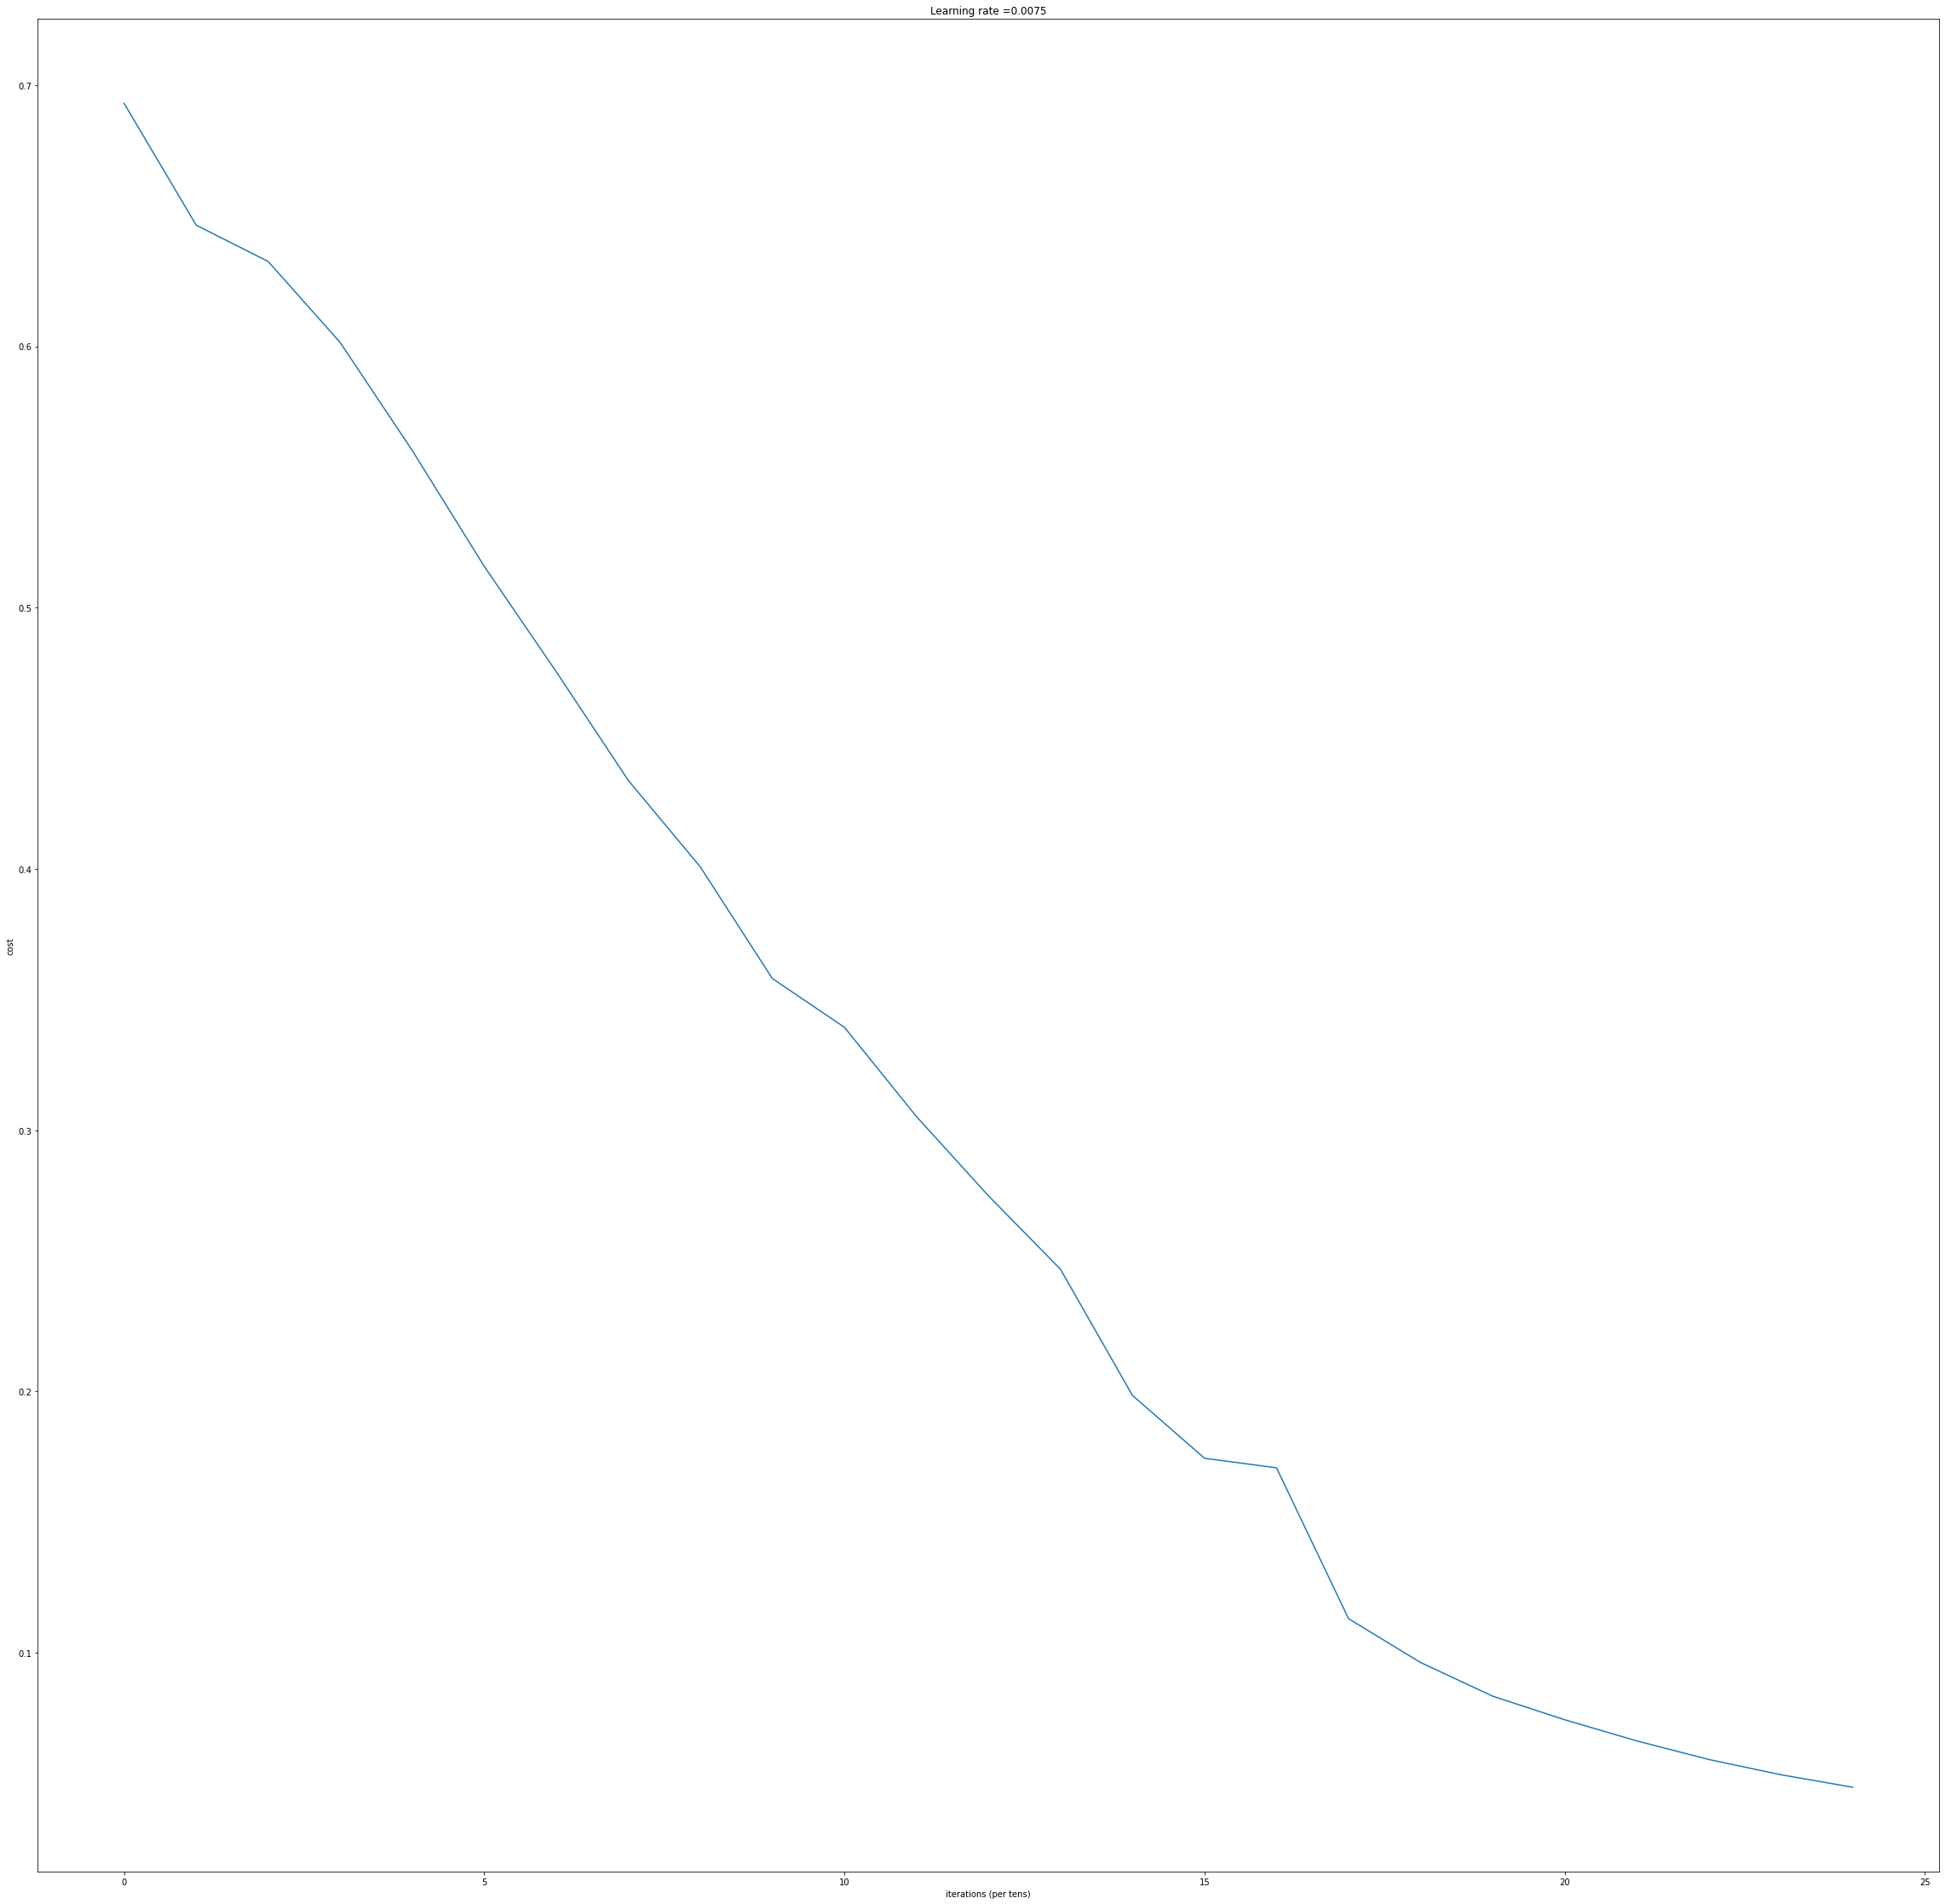

In [62]:
n_x = 12288
n_h = 7
n_y = 1
layer_dims = (n_x,n_h,n_y)

parameters = two_layer_model(train_x,train_set_y,layers_dims = (n_x,n_h,n_y),num_iterations = 2500,print_cost = True,isPlot = True)


In [63]:
def predict(X,y,parameters):
    m = X.shape[1]
    n = len(parameters)//2
    p = np.zeros((1,m)) #给定数据集X的预测
    
    probas,caches = L_model_forward(X,parameters)
    #probas存放在最后迭代的parameters下进行前向传播后的输出值
    for i in range(0,probas.shape[1]):
        if probas[0,i]>0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("准确度为:"+str(float(np.sum((p == y))/m)))#如果等于，则对应为1，看有多少个相同就有多少个1相加
    return p

In [64]:
p=[0,1,0,1,1,1]
y=[1,1,1,0,1,1]
print(np.sum(y==p))

0


In [65]:
predictions_train = predict(train_x,train_y,parameters)
predictions_test = predict(test_x,test_y,parameters)

准确度为:1.0
准确度为:0.72


In [66]:
def L_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False,isPlot=True):
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0,num_iterations):
        AL,caches = L_model_forward(X,parameters)
        
        cost = compute_cost(AL,Y)
        
        grads = L_model_backward(AL,Y,caches)
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if i%100 ==0:
            costs.append(cost)
            
            if print_cost:
                print("第",i,"次迭代，成本值为:",np.squeeze(cost))
    if isPlot:
            plt.plot(np.squeeze(costs))#从数组的形状中删除单维度条目，即把shape中为1的维度去掉
            plt.ylabel('cost')
            plt.xlabel('iterations(per 100)')
            plt.title("Learning rate="+str(learning_rate))
            plt.show()
    return parameters

In [101]:
train_set_x_ori,train_set_y,test_set_x_orig,test_set_y,classes = lr_utils.load_dataset()

train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

train_x = train_x_flatten/255  #存放输入的特征矩阵
print(train_x_flatten)
train_y = train_set_y        #存放标签值
test_x = test_x_flatten/255
test_y = test_set_y

[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]


第 0 次迭代，成本值为: 0.715731513413713
第 100 次迭代，成本值为: 0.6747377593469114
第 200 次迭代，成本值为: 0.6603365433622126
第 300 次迭代，成本值为: 0.6462887802148751
第 400 次迭代，成本值为: 0.6298131216927774
第 500 次迭代，成本值为: 0.606005622926534
第 600 次迭代，成本值为: 0.5690041263975134
第 700 次迭代，成本值为: 0.519796535043806
第 800 次迭代，成本值为: 0.464157167862823
第 900 次迭代，成本值为: 0.4084203004829893
第 1000 次迭代，成本值为: 0.37315499216069037
第 1100 次迭代，成本值为: 0.3057237457304713
第 1200 次迭代，成本值为: 0.2681015284774086
第 1300 次迭代，成本值为: 0.2387247482767257
第 1400 次迭代，成本值为: 0.20632263257914704
第 1500 次迭代，成本值为: 0.17943886927493516
第 1600 次迭代，成本值为: 0.15798735818801002
第 1700 次迭代，成本值为: 0.14240413012273673
第 1800 次迭代，成本值为: 0.12865165997884462
第 1900 次迭代，成本值为: 0.11244314998151156
第 2000 次迭代，成本值为: 0.08505631034959031
第 2100 次迭代，成本值为: 0.05758391198600472
第 2200 次迭代，成本值为: 0.04456753454691302
第 2300 次迭代，成本值为: 0.0380827516659641
第 2400 次迭代，成本值为: 0.034410749018394936


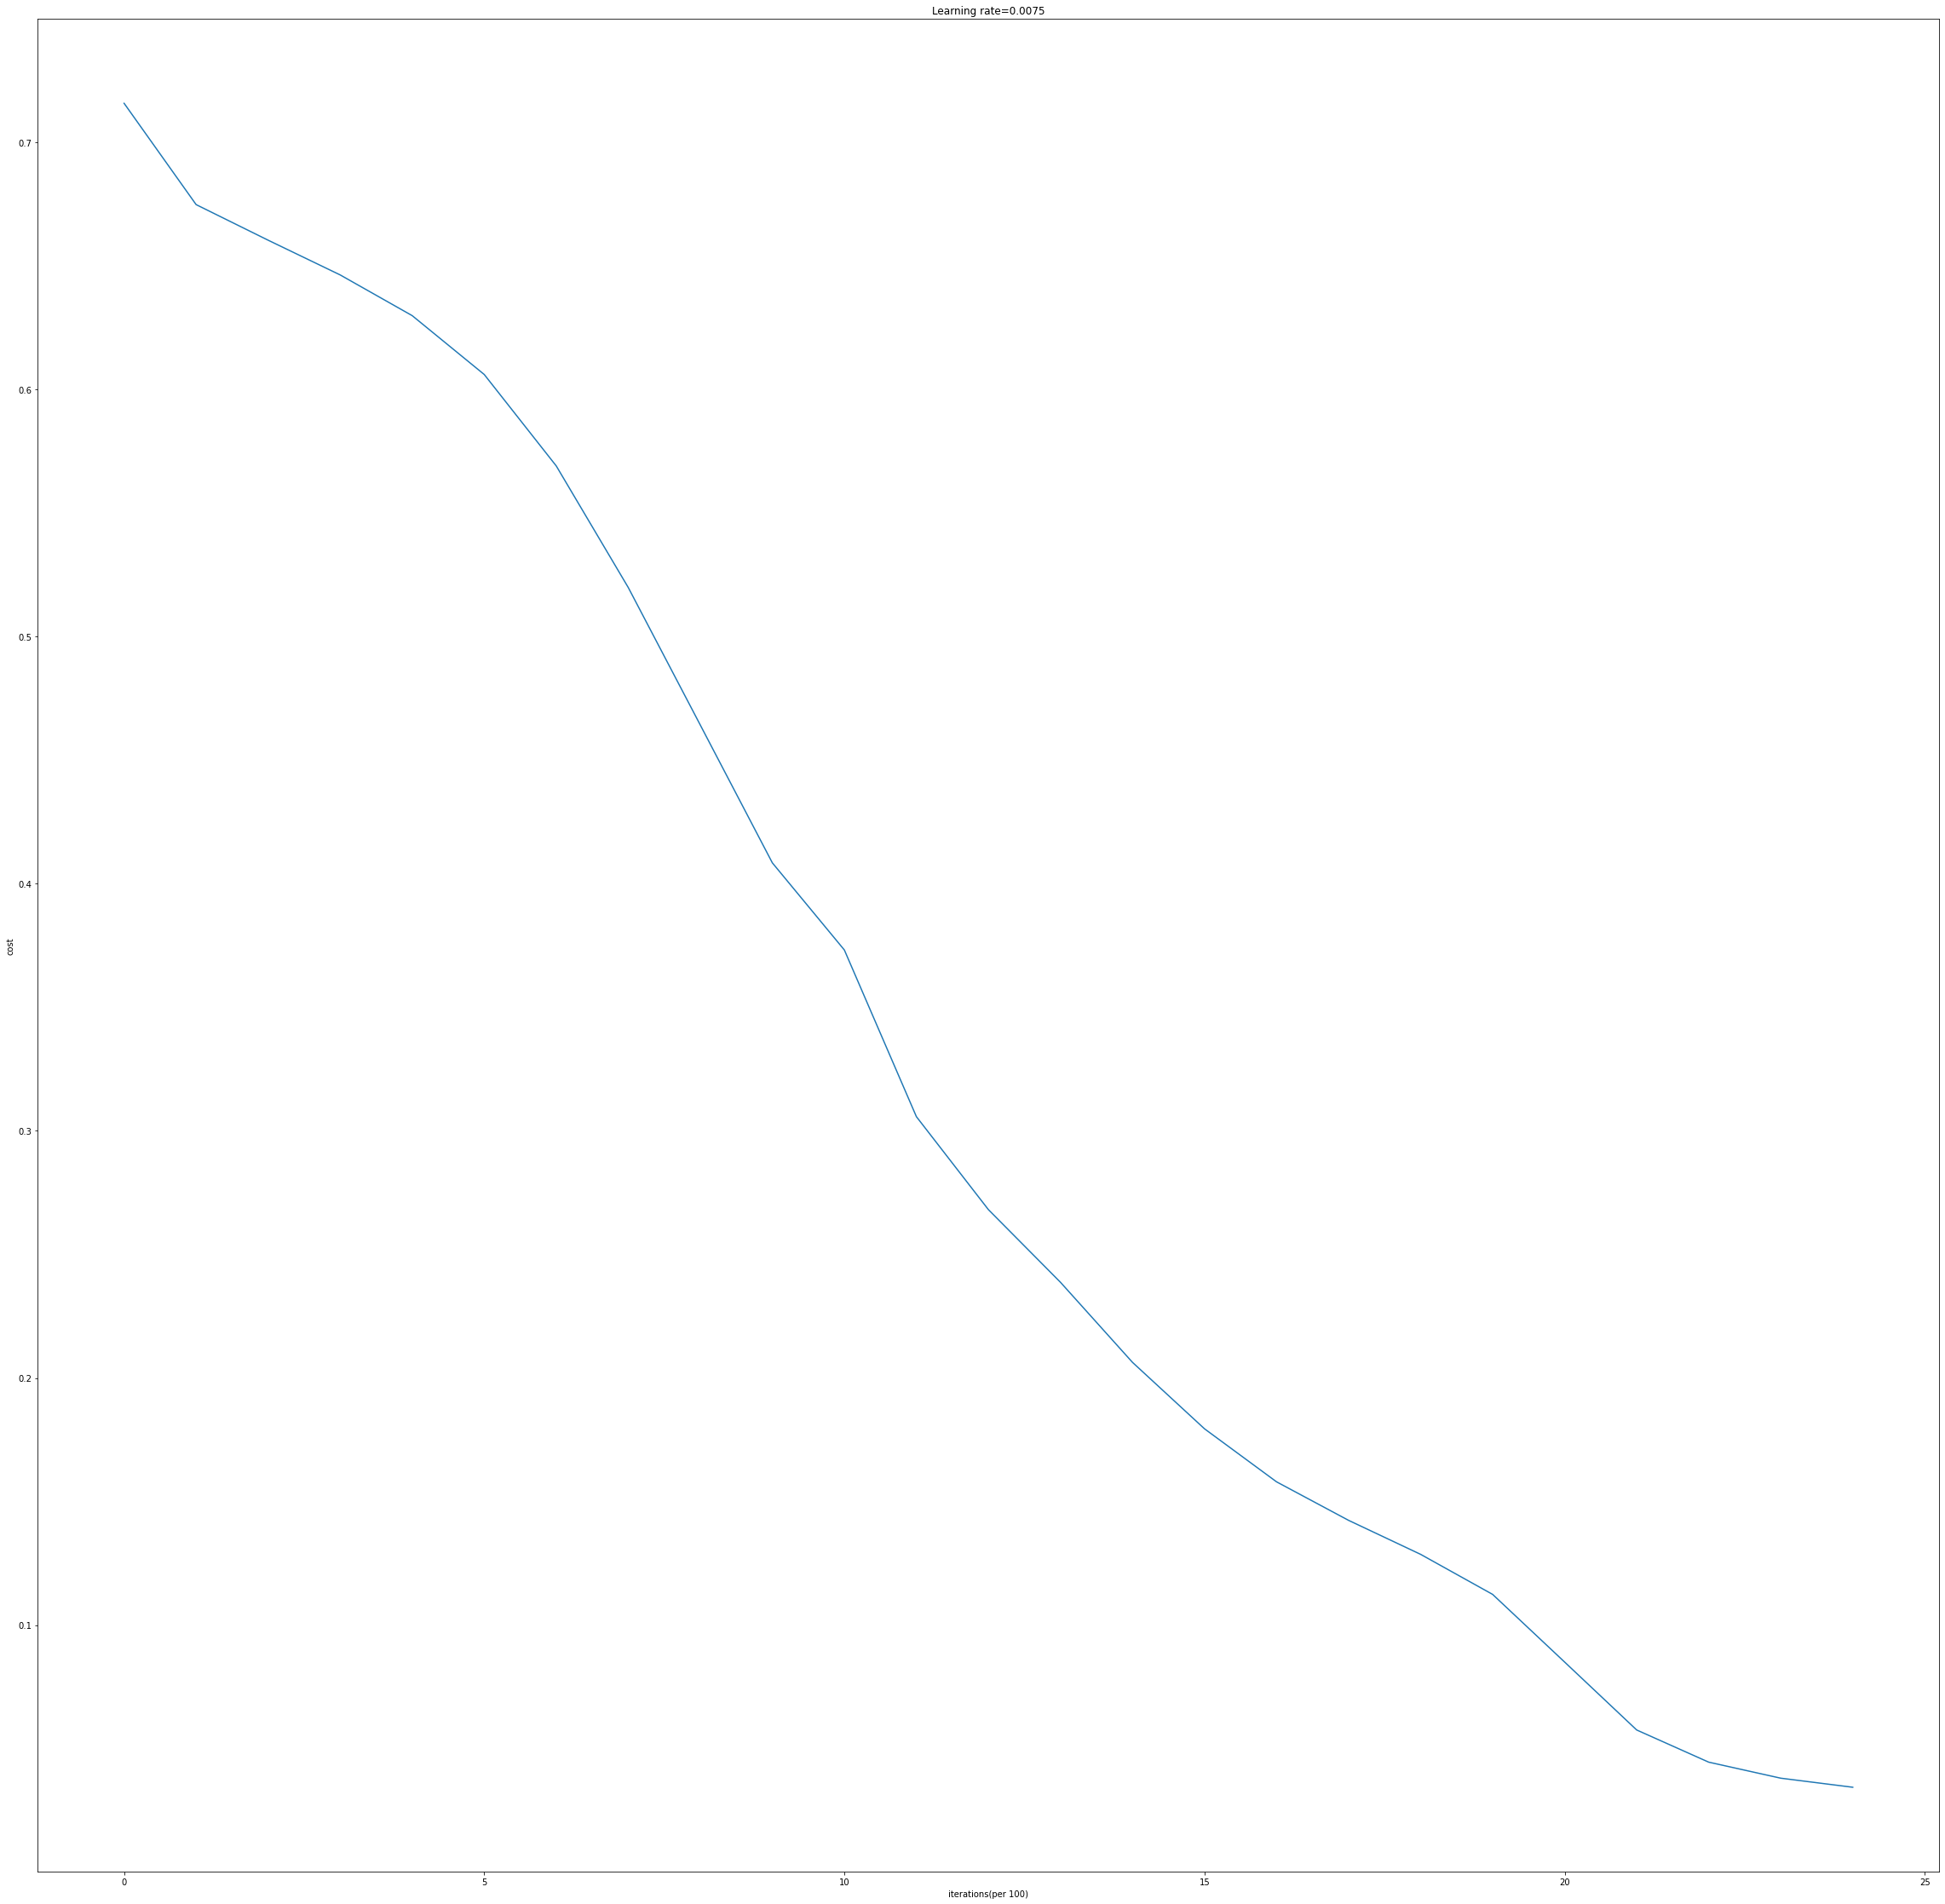

In [68]:
layers_dims = [12288,20,7,5,1]
parameters = L_layer_model(train_x,train_y,layers_dims,num_iterations = 2500,print_cost = True,isPlot = True)

In [69]:
pred_train = predict(train_x,train_y,parameters)
pred_test = predict(test_x,test_y,parameters)

准确度为:0.9952153110047847
准确度为:0.78


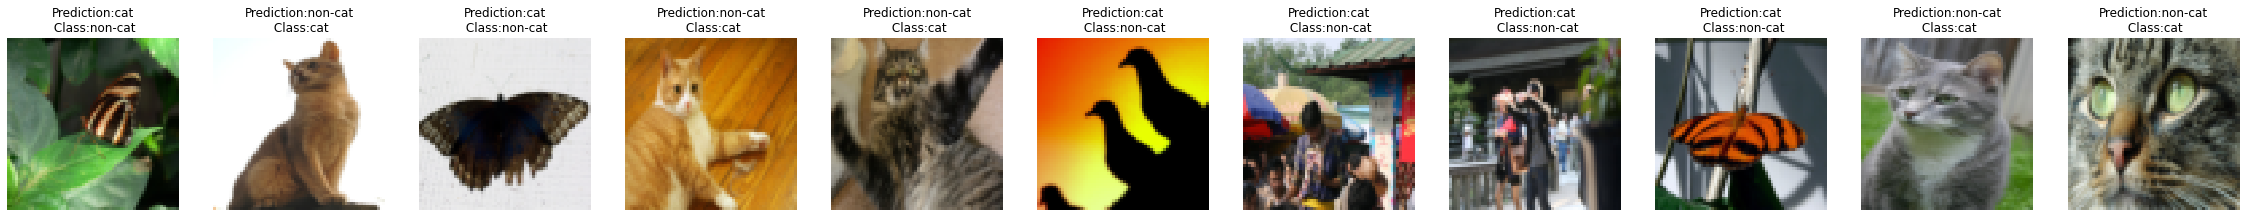

In [70]:
def print_mislabeled_images(classes,X,y,p): #classes表示的是字符cat或不是cat
    a=p+y#p是预测值
    mislabeled_indices = np.asarray(np.where(a==1))#,np.asarray将数组转化为一个矩阵，np.where输出满足条件 (即非0) 元素的坐标
    plt.rcParams['figure.figsize'] = (40.0,40.0) #设置输出图像大小
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2,num_images,i+1)#把显示界面分割成2*3的网格。其中，第一个参数是行数，第二个参数是列数，第三个参数表示图形的标号。
        plt.imshow(X[:,index].reshape(64,64,3),interpolation='nearest')
        plt.axis('off') #关闭坐标轴
        plt.title("Prediction:"+classes[int(p[0,index])].decode("utf-8")+"\n Class:"+classes[y[0,index]].decode("utf-8"))
        
print_mislabeled_images(classes,test_x,test_y,pred_test)    
        
        
    

[[0.78039216]
 [0.89019608]
 [0.32156863]
 ...
 [0.42132353]
 [0.61176471]
 [0.10245098]]
准确度为:0.0
y' = 0.0, your L-layer model predicts a "non-cat" picture.


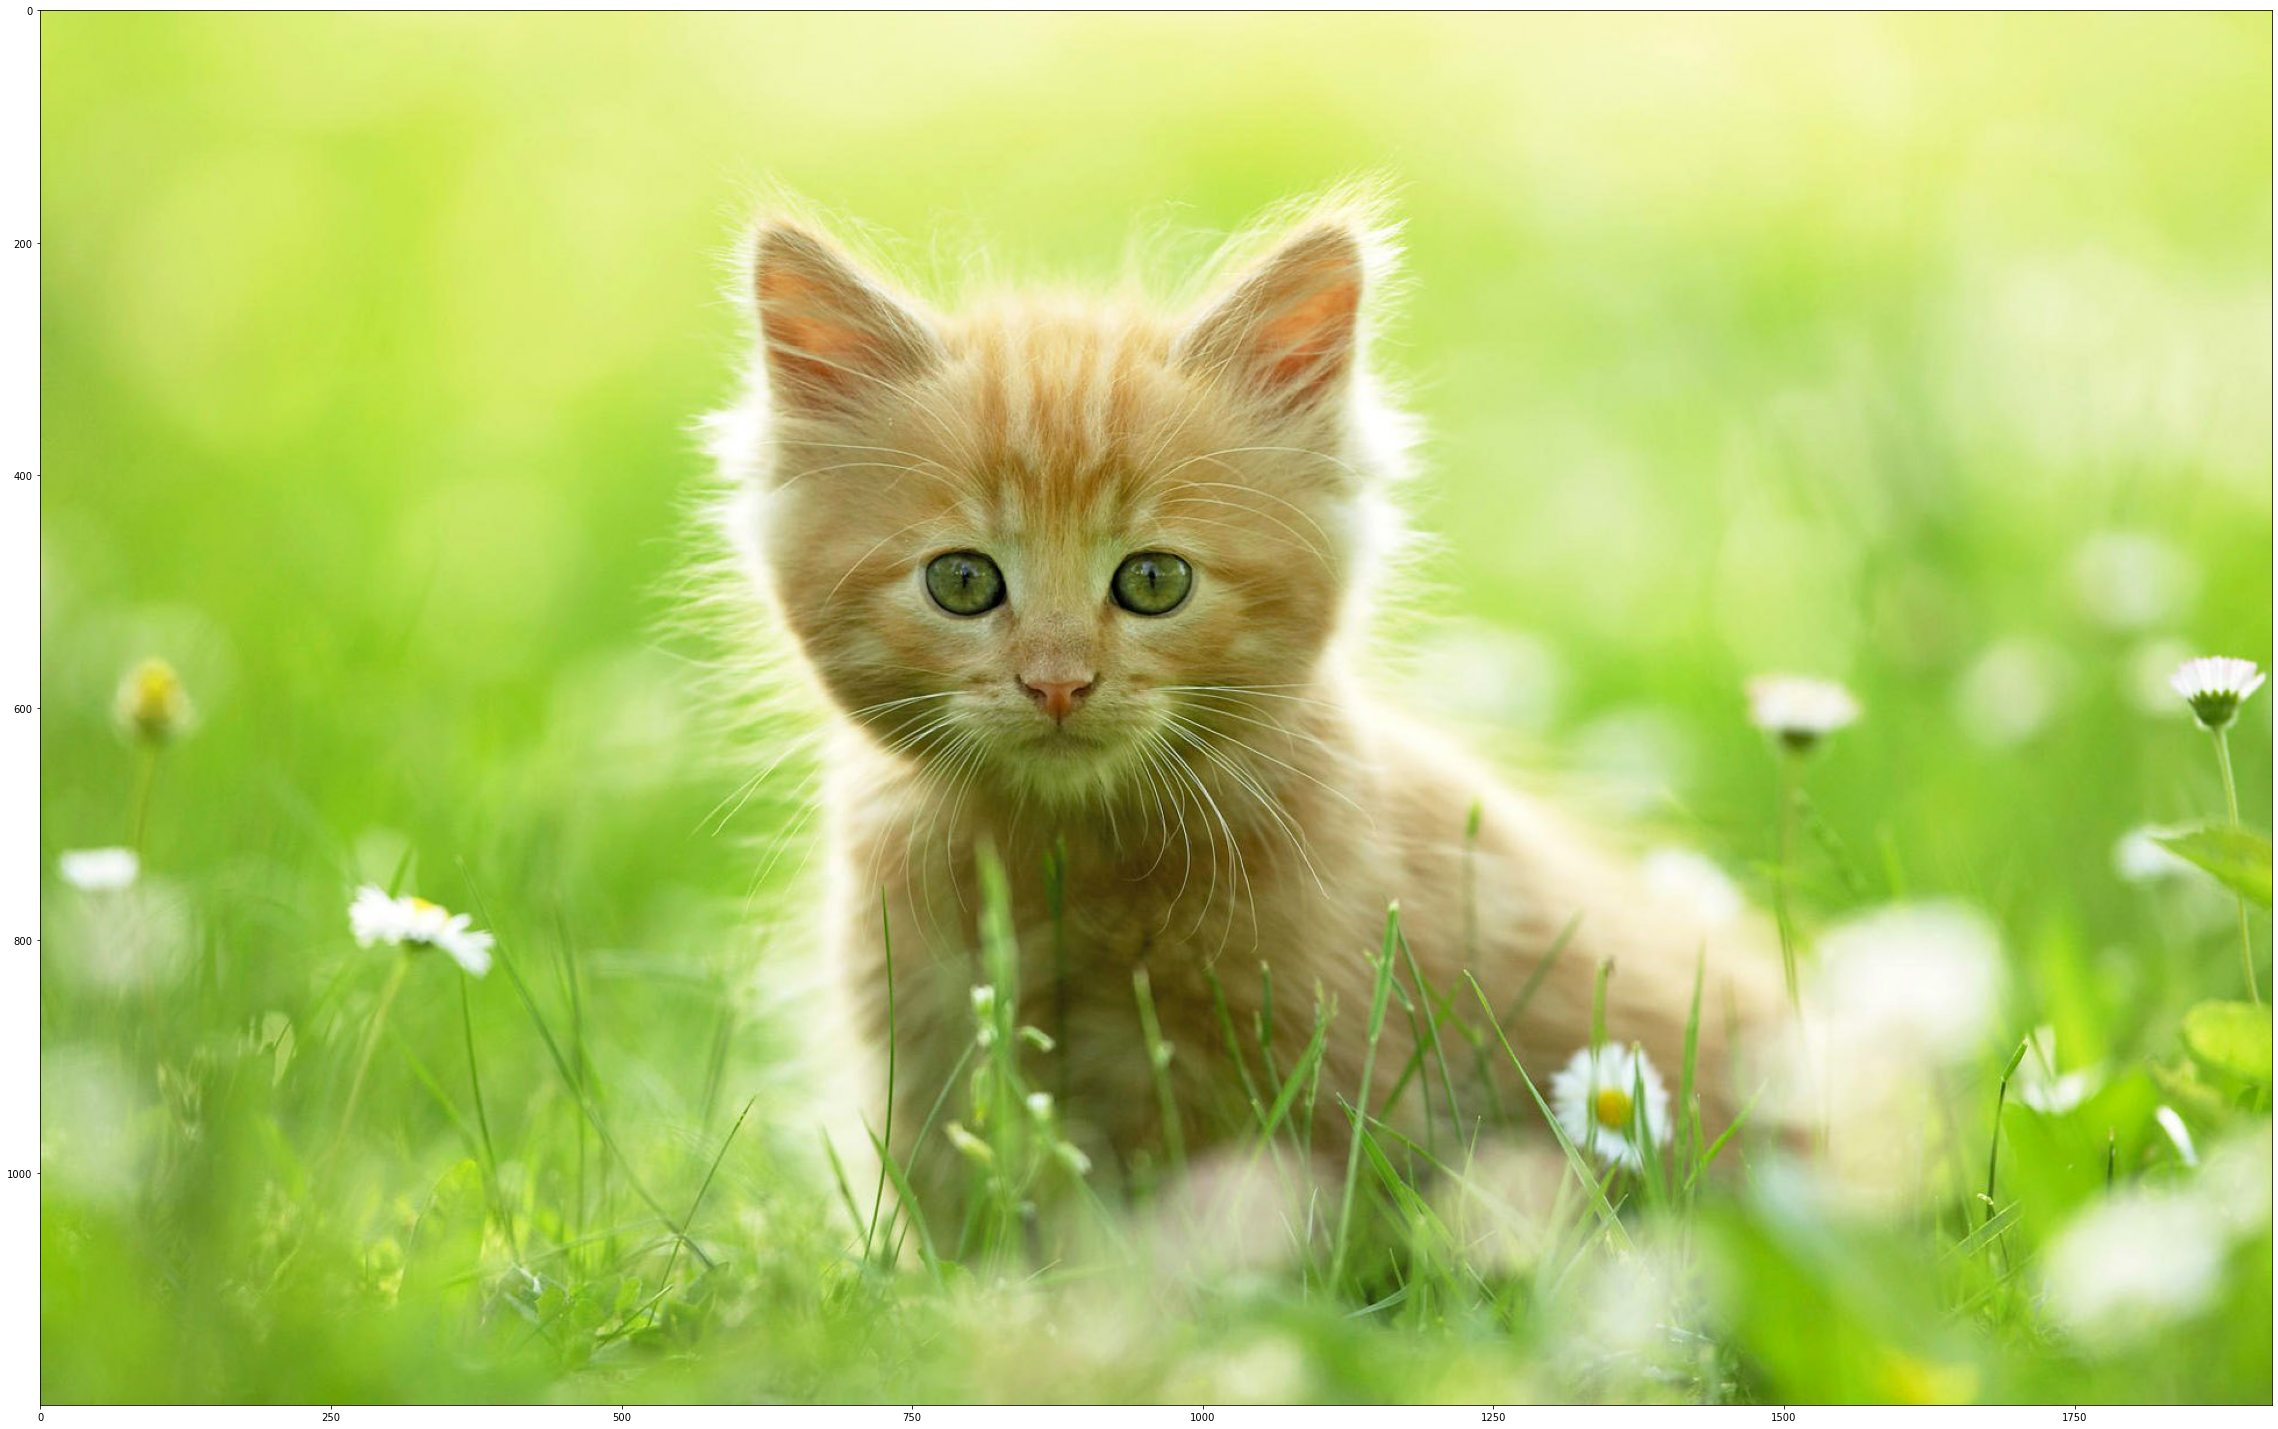

In [94]:
fname = r"C:\Users\cs-demo\Desktop\cat5.jpg"
image=plt.imread(fname)
plt.imshow(image)
y=[1]
from skimage import transform
image_train = transform.resize(image , (64,64,3)) . reshape(64*64*3 , 1)
#image_train = image_train/255
print(image_train)
my_predicted_image  = predict(image_train , y ,parameters)
print ("y' = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
 

准确度为:1.0


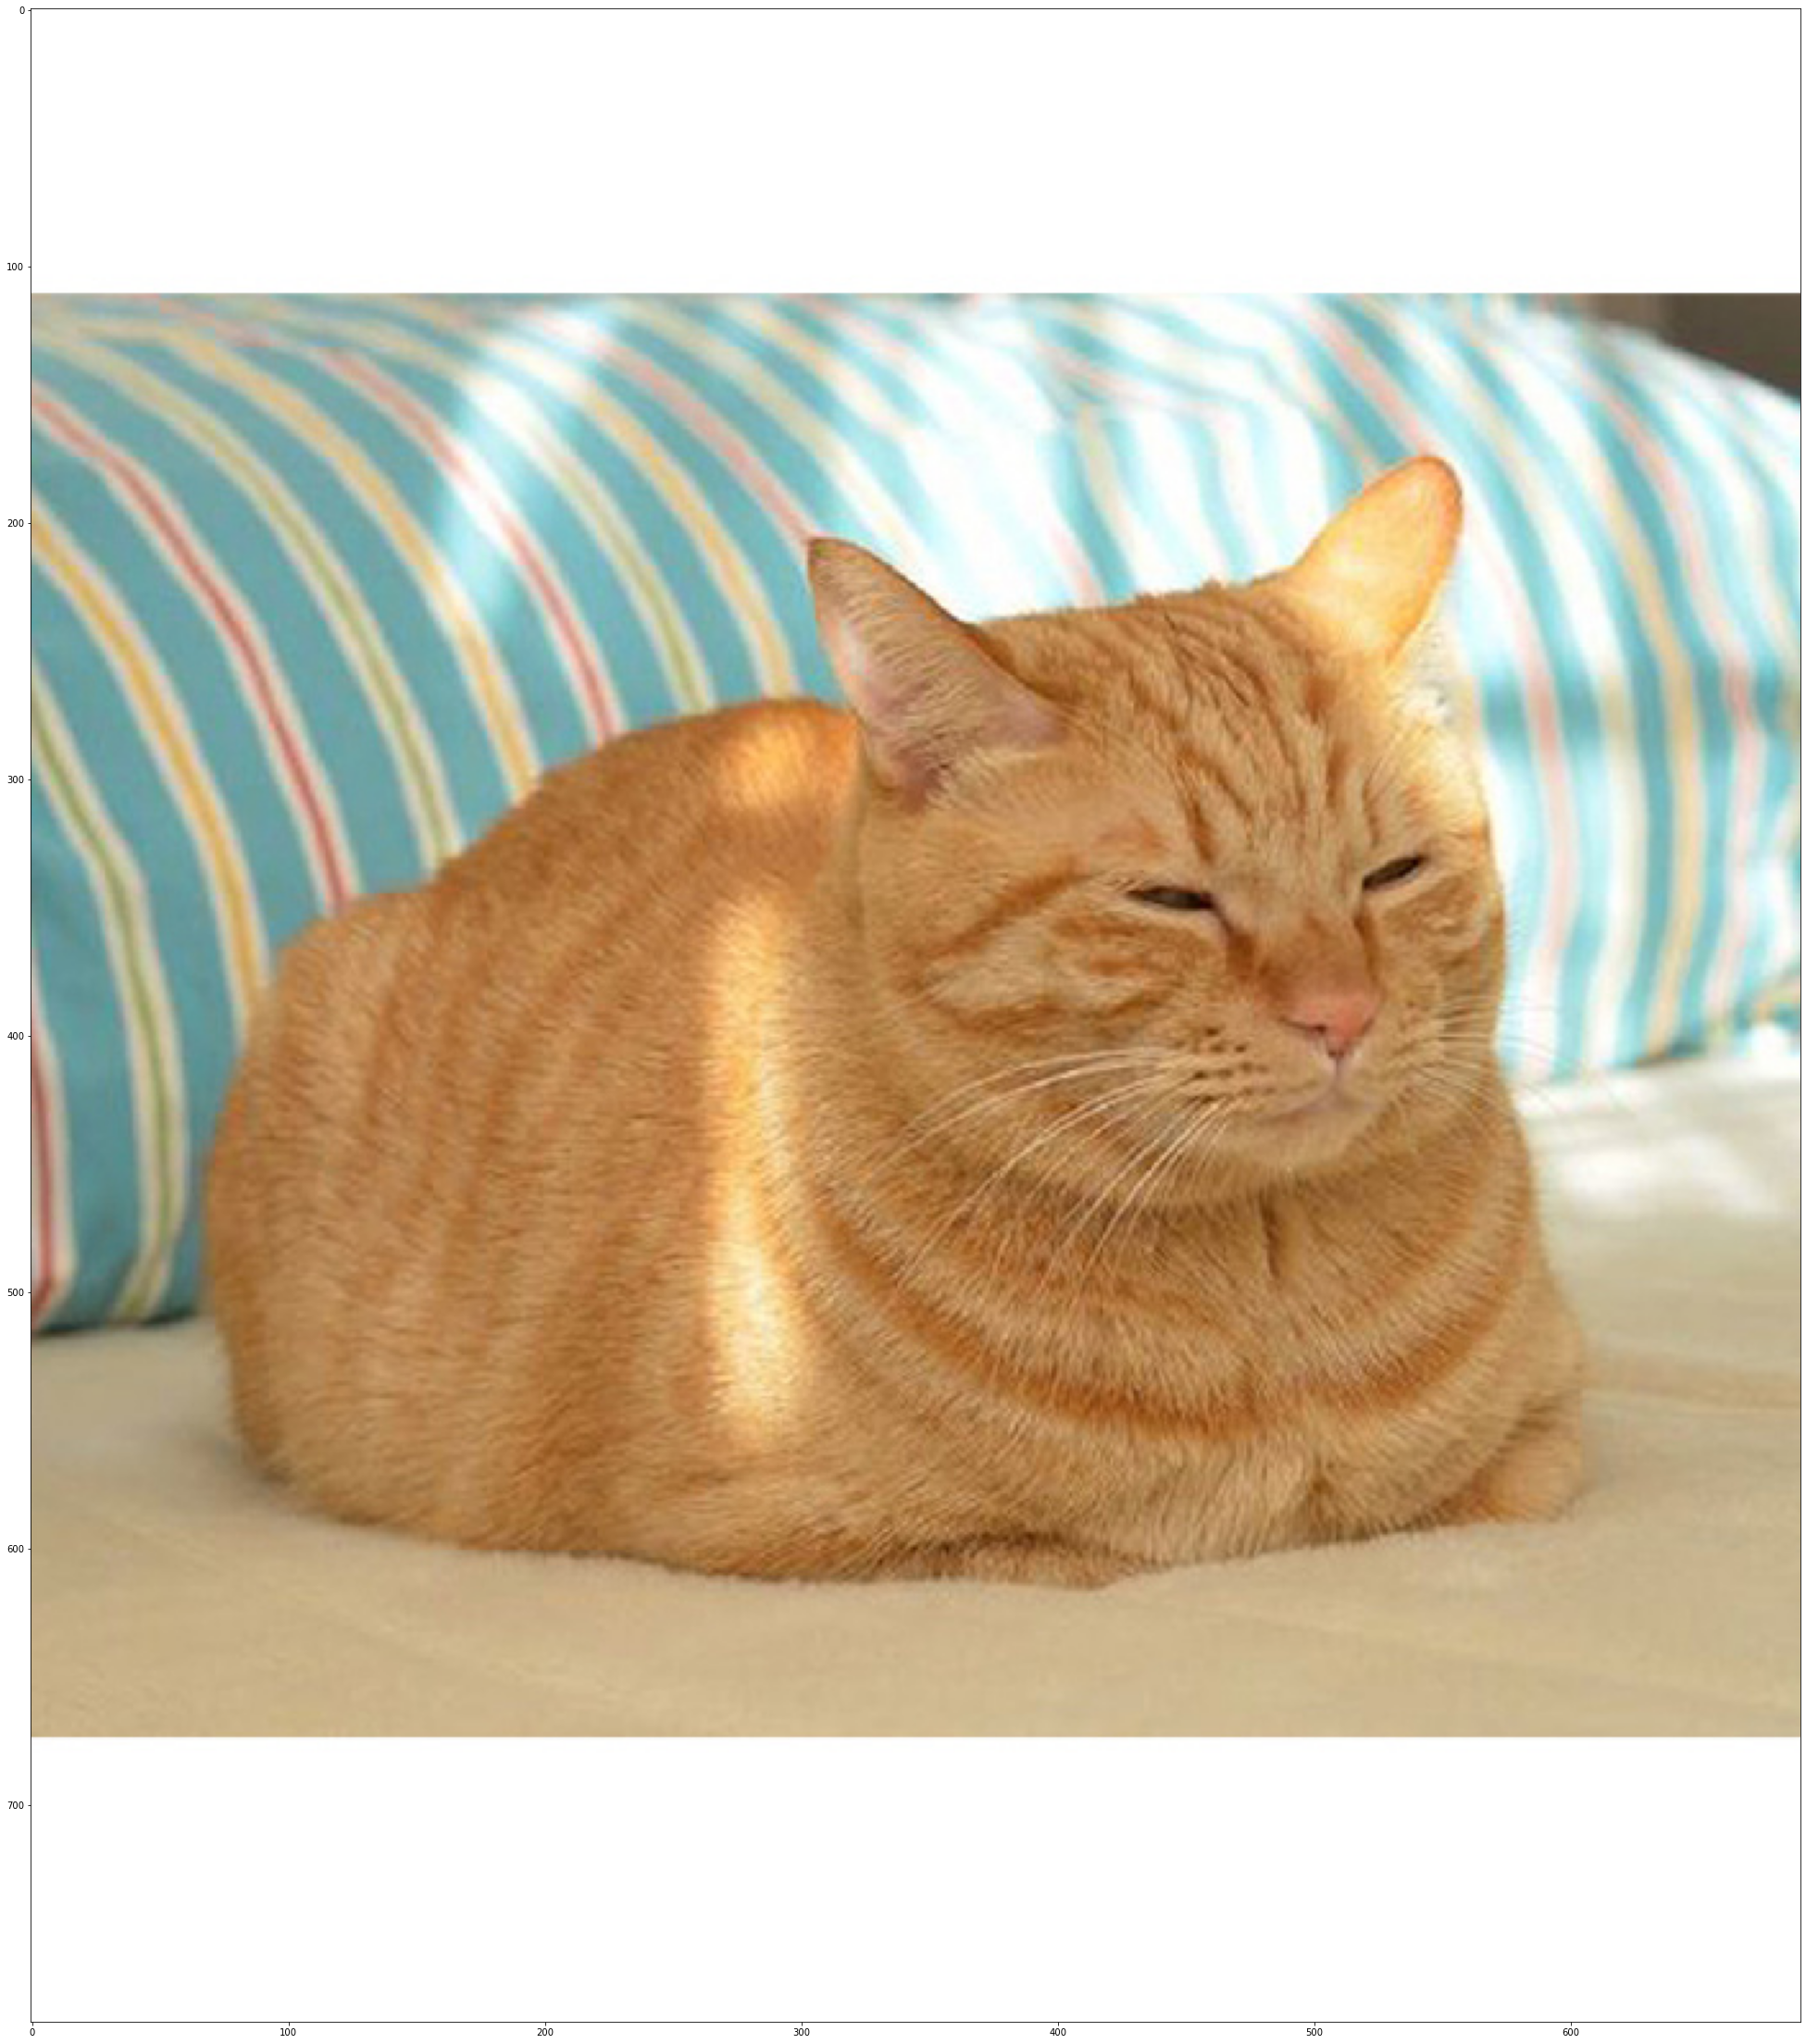

y = 0.0, your L-layer model predicts a "non-cat"picture.


In [114]:
from PIL import Image
my_label_y = [0]  # the true class of your image (1 -> cat, 0 -> non-cat)
num_px = 64
image = Image.open('C:/Users/cs-demo/Desktop/cat.jpg')
my_image = np.array(image.resize((num_px, num_px), Image.ANTIALIAS))
my_image = my_image.reshape(num_px * num_px * 3, -1)
#print(image_train)
predict_my_image = predict(my_image, my_label_y, parameters)
plt.imshow(image)
plt.show()
print("y = " + str(np.squeeze(predict_my_image)) + ", your L-layer model predicts a \"" + classes[
    int(np.squeeze(predict_my_image))].decode("utf-8") + "\"picture.")